# Intro
Hello! I started learning CS, programming and Data Science nearly 2 months ago and i think it's time to start my first Kaggle competition analysis project. My main goal is to practise main EDA technics, build and compare a couple of models and beat my fitst submission from the 'Titanic learning micro-course'.

I will be glad to hear your feedback!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')

First of all i set the notebook and import all the libraries needed for EDA (Exploratory Data Analysis).
Then i import both train and test csv files given in the competition.

In [2]:
train_df=pd.read_csv("input/train.csv",index_col="PassengerId")
test_df=pd.read_csv("input/test.csv",index_col="PassengerId")

The next step is to explore the whole dataset using general functions and methods.

In [3]:
train_df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### 3 features have null values: 'Age', 'Cabin' and 'Embarked'.

*'Age'* feature to my mind is going to be very correlated with the target feature 'Survived'
that's why i can't drop this column and will have to find the best way to replace missing values.

*'Embarked'* feature has only 2 missing values which i will easily replace with maybe mean values of the column.
And i think that the port of embarkment isn't really tied with the taget feature, but i'll check it later to make sure.

*'Cabin'* feature has more than half missing values and it will be very difficult to replace them. I'll check if there's any
strong relations for this feature but as for now i think i will drop this column.


In [5]:
train_df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

*describe() shows results only for numeric features

In [6]:
train_df.shape

(891, 11)

# PART 1. EDA

# 1. EDA of the whole dataset.
## 1.1. Histograms of all features 

I need to drop all non-numeric features or turn them into numeric in order to build histogram.

It seems like the only feature that can be successfully turned into numeric is 'Sex'. Maybe 'Embarked' can also be transformed but i think i'll be able to explore it using other methods(without plots).

I want to see 'Sex' feature among other histograms so i turn it into binary using map() function.

In [7]:
train_df['Sex']=train_df['Sex'].map({'female':0,'male':1})

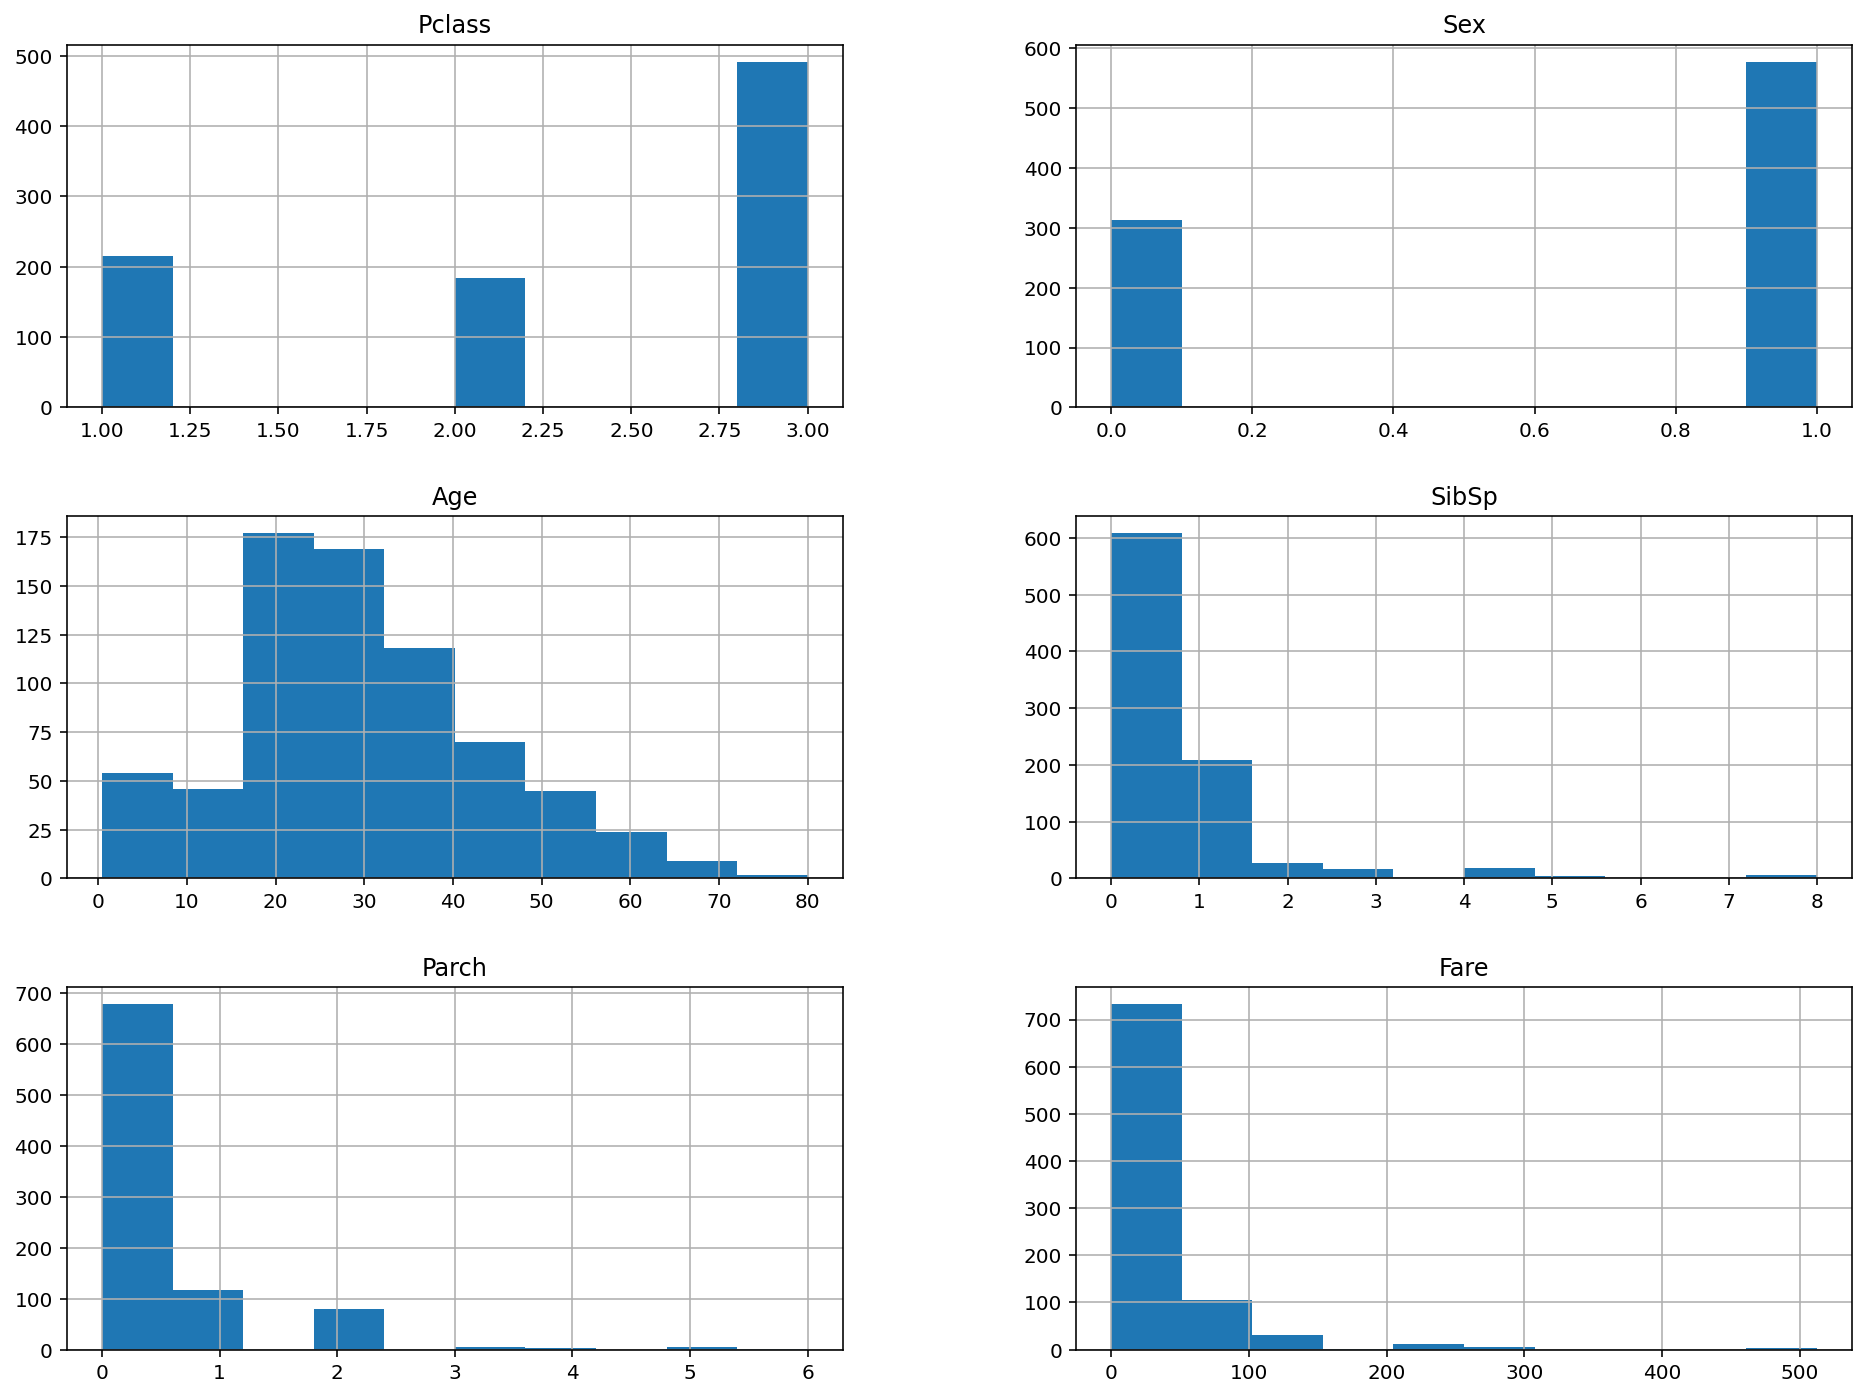

In [8]:
plt.rcParams['figure.figsize']=(16,12)
train_df.drop(['Name','Cabin','Embarked','Ticket','Survived'], axis=1).hist();

#### Problems that i encountered during this step:
1)Map() function for 'Sex' returned 'Nan' for all values. The solution was: -write map function for 'sex' and plotting code in 2 different cells.(i will be glad if somebody explains to me why i cant do it in one cell. As far as i know code is run sequentially from top to bottom) <br>
2)After i solved problems with 'Sex' feature plot was refusing to plot itself. I failed to find solution anywhere and finally restart&run kernel. After this everything worked fine.

#### Ideas that the histograms of numeric fetures gives: 
1)there are ~90 kids on board a ship <br>
2)most of the passengers travelled alone <br>
3)most of the passengers had level-3 tickets

## 1.2. Correlation metrics

During this step i will use corr() function on different features and build a couple of heatmap plots for further exploration of features.

First of all i create a heatmap for all of the feature to see the correlation between them.

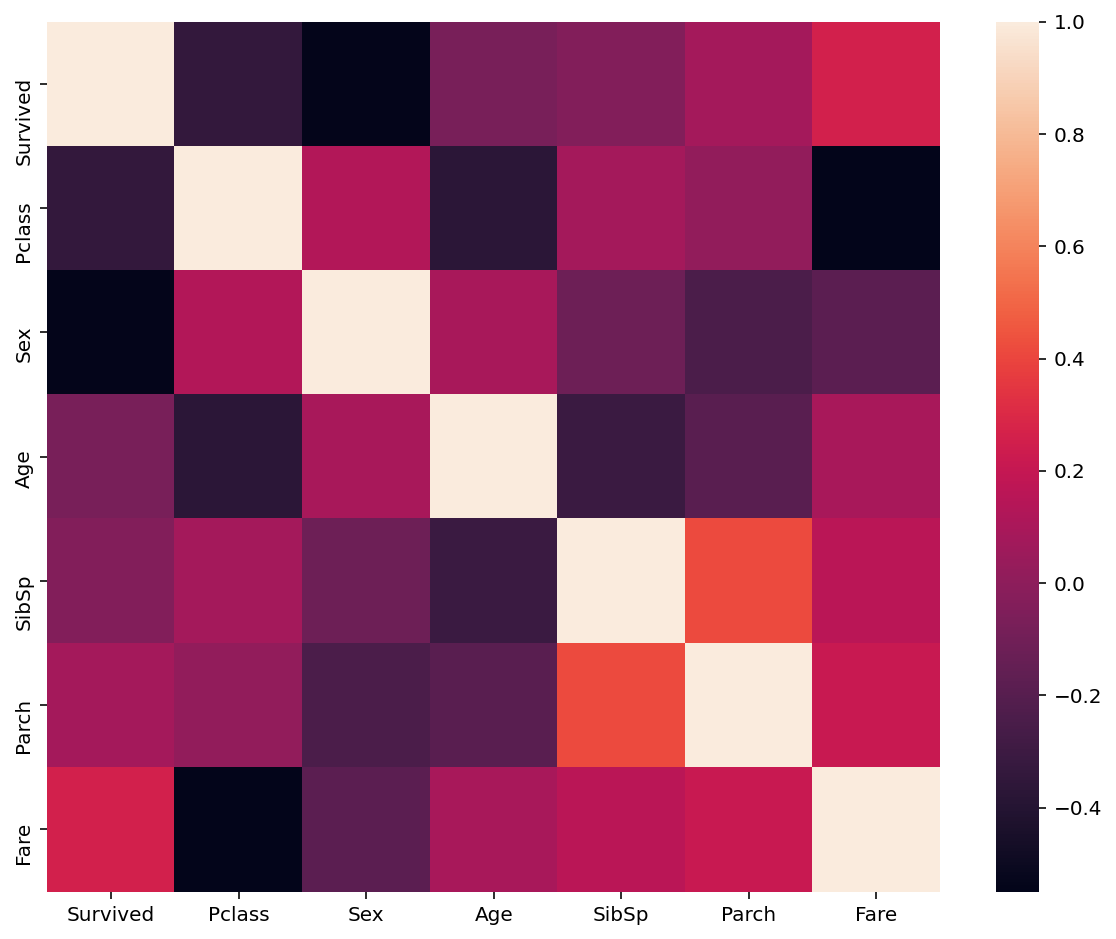

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(method='pearson'));

From the plot we can conclude that the biggest corellation metrics are between: <br>
*Negative*: 1) Pclass - Fare 2) Sex - Survived <br>
*Positive*: 1) SibSp - Parch  <br>
These indicators are very natural.

# 2. EDA of single features

sns.boxplot turns out to be not very useful for binary features and numeric features with small number of unique values.
In Titanic case only 'Age' feature works well with this plot. We see that most of the passengers are 20-40 years old. However I needn't build the boxplot to find this out.

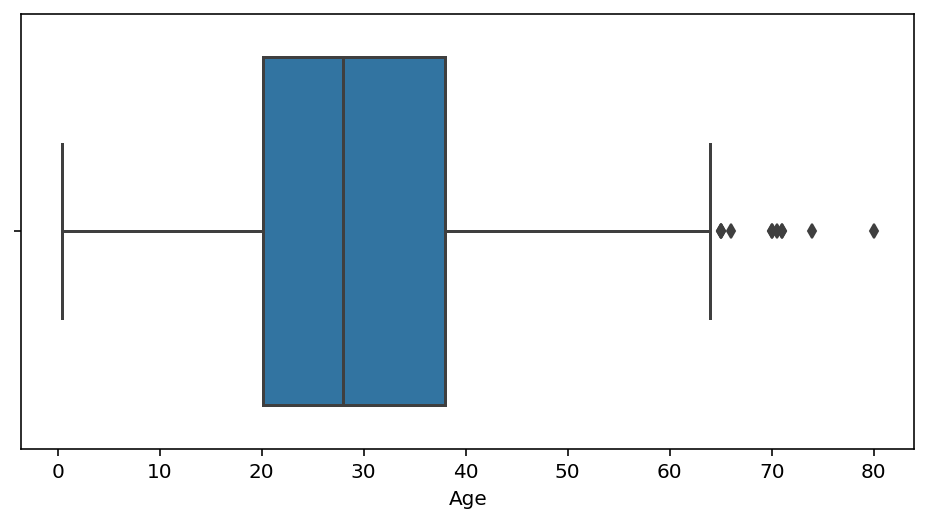

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Age',data=train_df);

In [11]:
train_df['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [12]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# 3. Feature interractions

First i will explore each feature in pare with the target feature. plt.scatter doesn't work fine here, and i can't really interpret something with it (if somebody knows the way, please tell me).

### 'Pclass'

In [14]:
pd.crosstab(train_df['Survived'],train_df['Pclass'])

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

The biggest percentage of survived is people with class 1 tickets. People with class 3 tickets weren't very lucky.

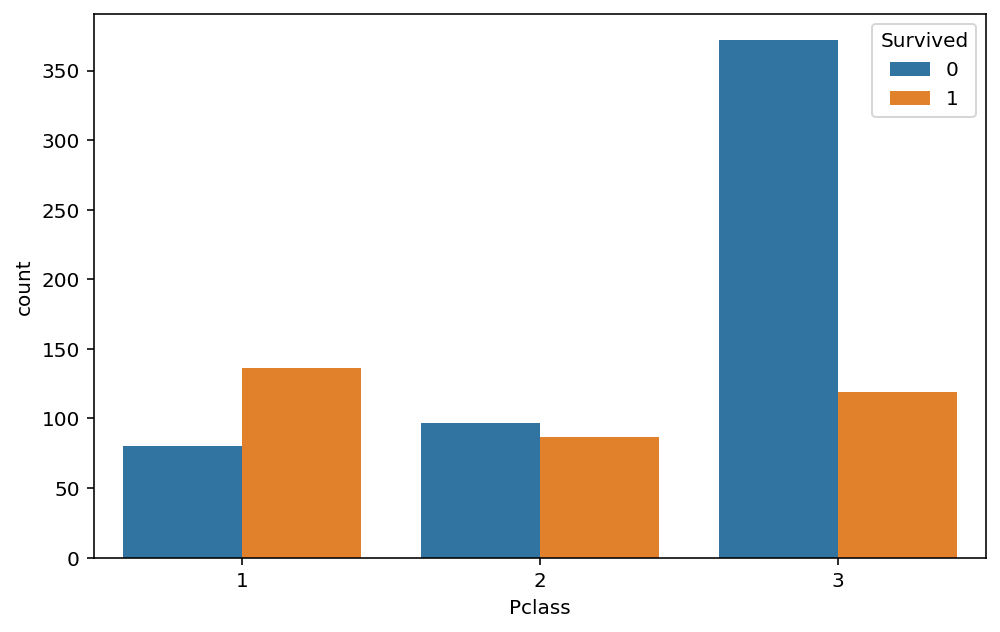

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass',hue='Survived',data=train_df);

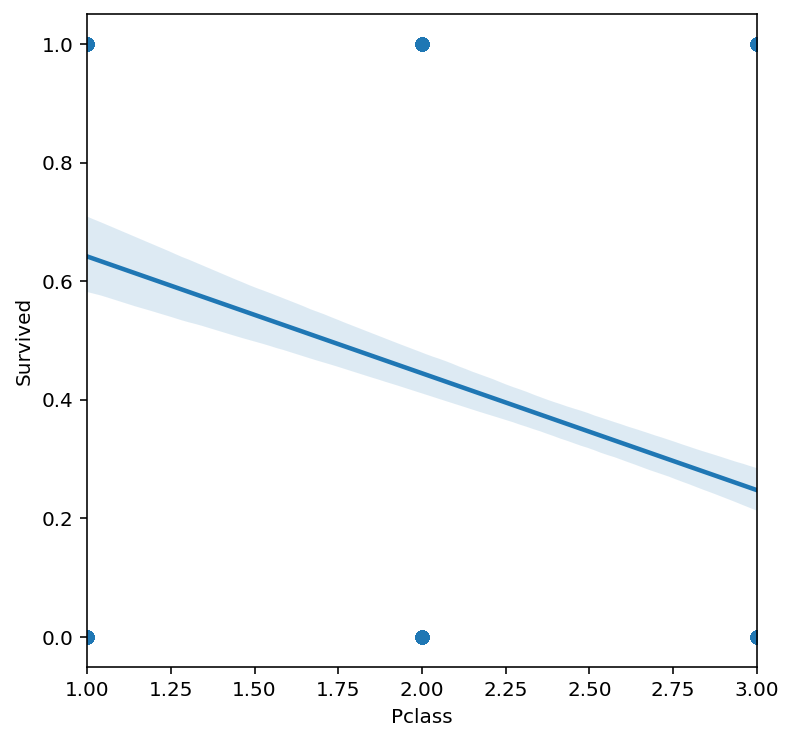

In [16]:
plt.figure(figsize=(6,6))
sns.regplot(x=train_df['Pclass'],y=train_df['Survived']);

In [17]:
train_df.groupby('Survived')['Pclass'].agg(np.mean)

Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

*Conclusion*: i will definetely add this feature to the future model.

### 'Name'
Not sure what to do with this one yet, but i don't think it has any relation to the surviving probability.

### 'Sex'

In [18]:
pd.crosstab(train_df['Survived'], train_df['Sex'])

Sex         0    1
Survived          
0          81  468
1         233  109

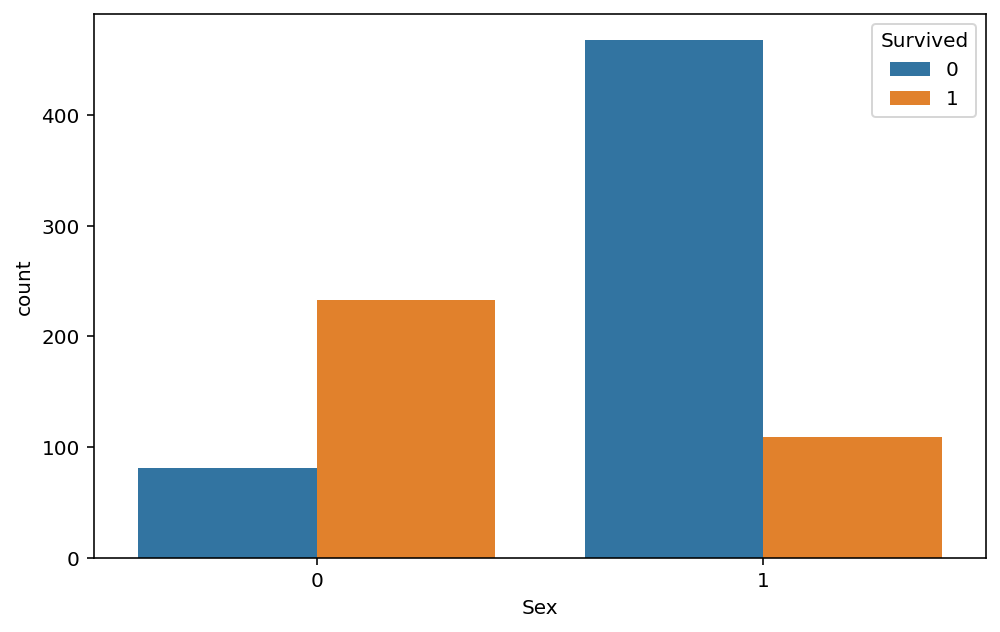

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex',hue='Survived',data=train_df);

In [20]:
train_df.groupby('Survived')['Sex'].agg(np.mean)

Survived
0    0.852459
1    0.318713
Name: Sex, dtype: float64

Men are so sacrificial...

### 'SibSp'

In [21]:
pd.crosstab(train_df['Survived'], train_df['SibSp'])

SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0

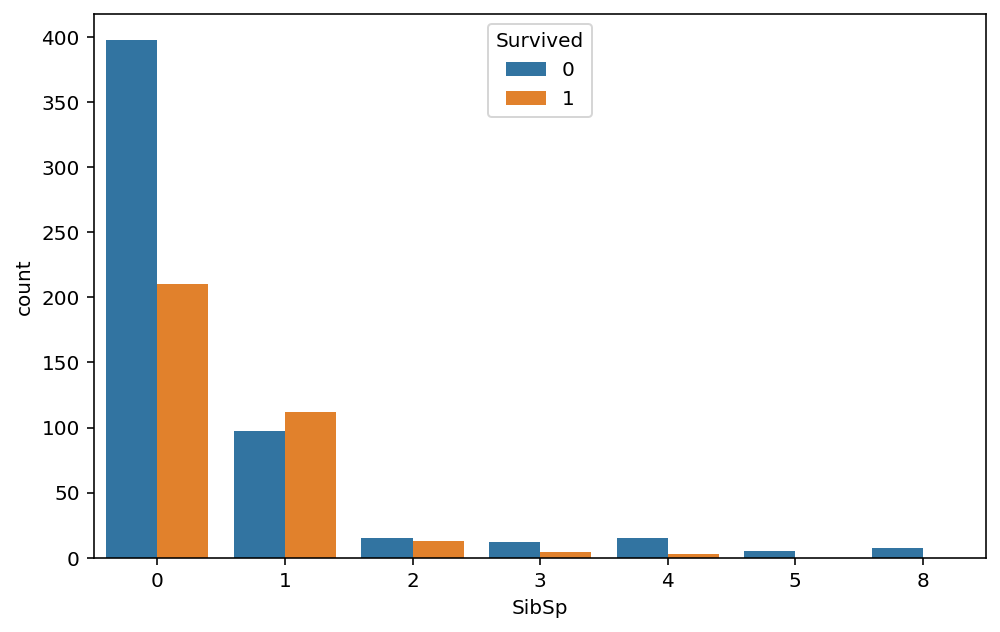

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='SibSp',hue='Survived',data=train_df);

The plot above shows that people who had 1<SibSp<3 had much bigger chances of surviving than others.

### 'Parch'

In [23]:
pd.crosstab(train_df['Survived'], train_df['Parch'])

Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0

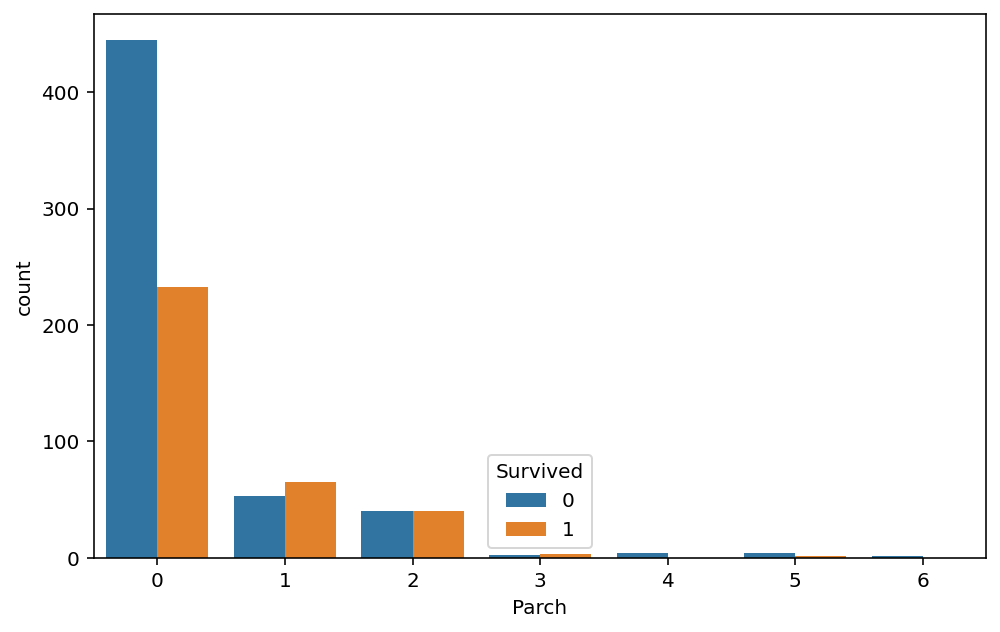

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='Parch',hue='Survived',data=train_df);

In [25]:
train_df.groupby('Survived')['Parch','SibSp'].agg(np.mean)

Parch     SibSp
Survived                    
0         0.329690  0.553734
1         0.464912  0.473684

Results here are pretty similar to 'SibSp' feature.
The plot above shows that people who had 0<Parch<4 had much bigger chances of surviving than others.

### 'Ticket'

In [26]:
train_df['Ticket'].value_counts()

347082        7
1601          7
CA. 2343      7
CA 2144       6
347088        6
             ..
C.A. 29395    1
350034        1
233639        1
3474          1
368703        1
Name: Ticket, Length: 681, dtype: int64

I assume that tickets with several values are for people from one family, maybe they all have tickets with the same number. But i don't think i will use it in the model.

In [27]:
train_df.drop(['Ticket','Name'],axis=1,inplace=True)

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 109.6+ KB


### 'Fare'

Crosstab and countplot aren't the nest idea with this one. Here we need to build some plot that can show the relation with a lot of values (same situation for 'Age')

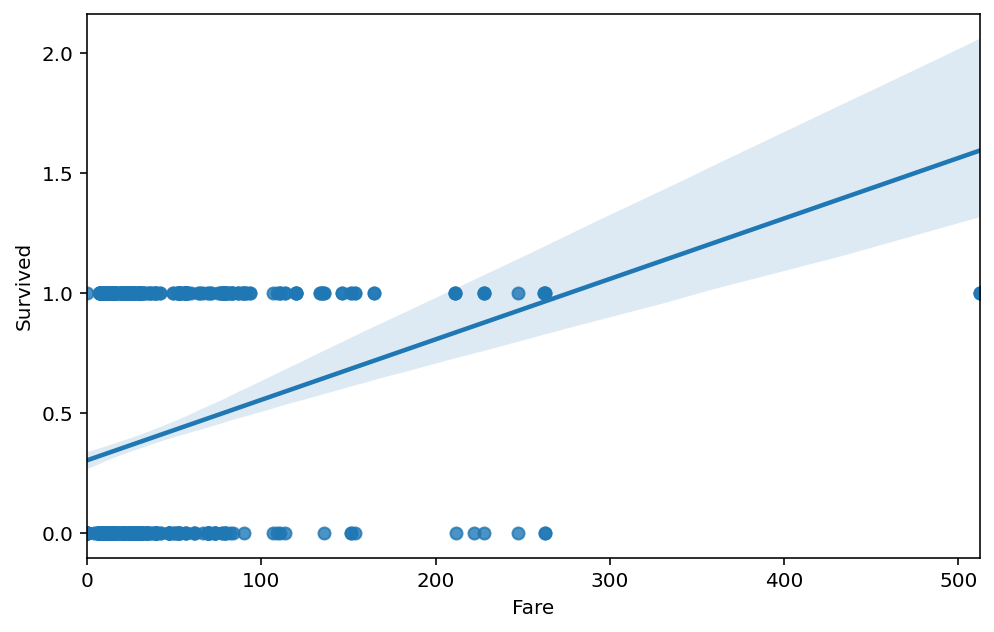

In [29]:
plt.figure(figsize=(8,5))
sns.regplot(x=train_df['Fare'],y=train_df['Survived']);

*Higher the 'Fare'* bigger the chance to survive

In [30]:
train_df.groupby('Survived')['Fare'].agg([np.mean,np.median])

mean  median
Survived                   
0         22.117887    10.5
1         48.395408    26.0

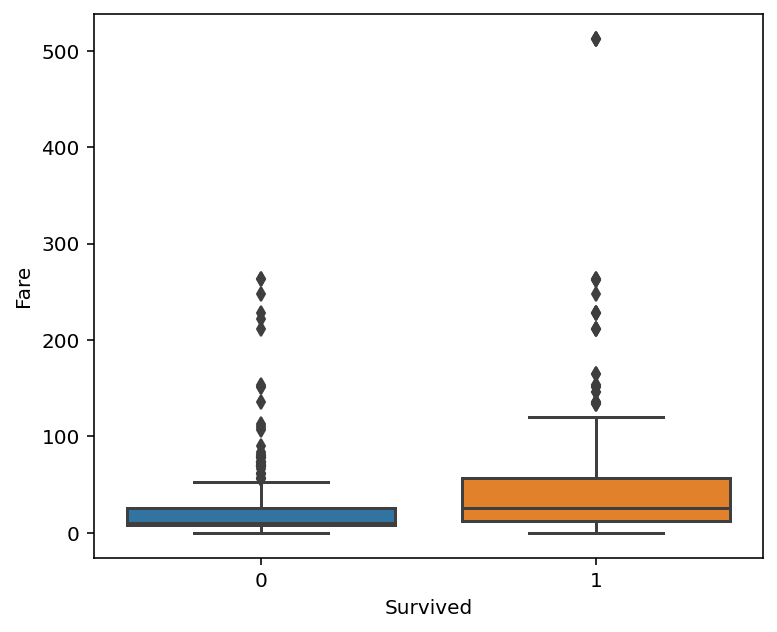

In [31]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Survived',y='Fare',data=train_df);

### 'Age'

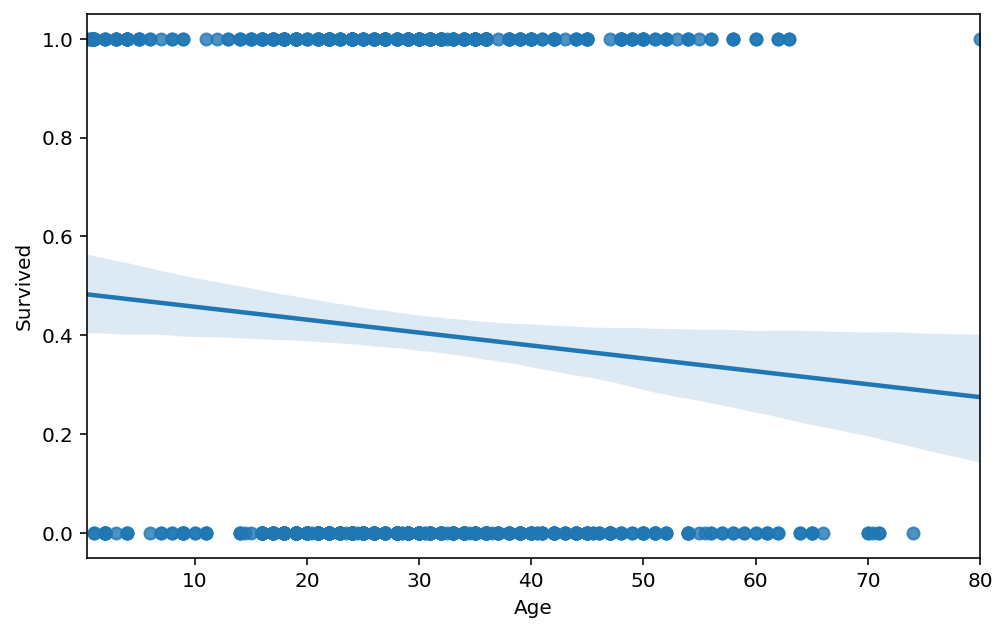

In [32]:
plt.figure(figsize=(8,5))
sns.regplot(x=train_df['Age'],y=train_df['Survived']);

*older people have more chances to die*

In [33]:
train_df.groupby('Survived')['Age'].agg([np.mean,np.median])

mean  median
Survived                   
0         30.626179    28.0
1         28.343690    28.0

In [34]:
train_df['Age'].mean()

29.69911764705882

Mean of 'Age' and age of those who survived are alomst equal. So i think this parameter isn't really useful for the model.

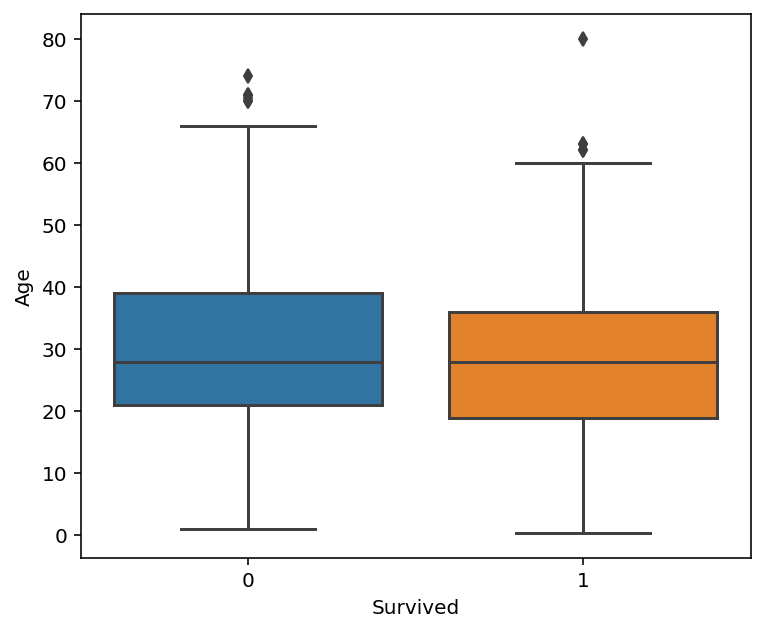

In [35]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Survived',y='Age',data=train_df);

The "Age' feature isn't really showing anything. Chances for surviving were equal among passengers of all ages.

I replace nan values with the mean age.

In [36]:
age_mean=train_df['Age'].mean()

In [37]:
train_df['Age']=train_df['Age'].fillna(age_mean)

In [38]:
train_df['Age'].mean()

29.699117647058763

### 'Cabin'

I'll leave it here for now.

In [39]:
train_df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              ..
E17            1
E50            1
D11            1
B3             1
A19            1
Name: Cabin, Length: 147, dtype: int64

In [40]:
train_df=train_df.drop('Cabin',axis=1)

For now i just drop 'Cabin' maybe when I learn how to deal with it otherwhise.

### 'Embarked'

In [41]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
pd.crosstab(train_df['Survived'], train_df['Embarked'])

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

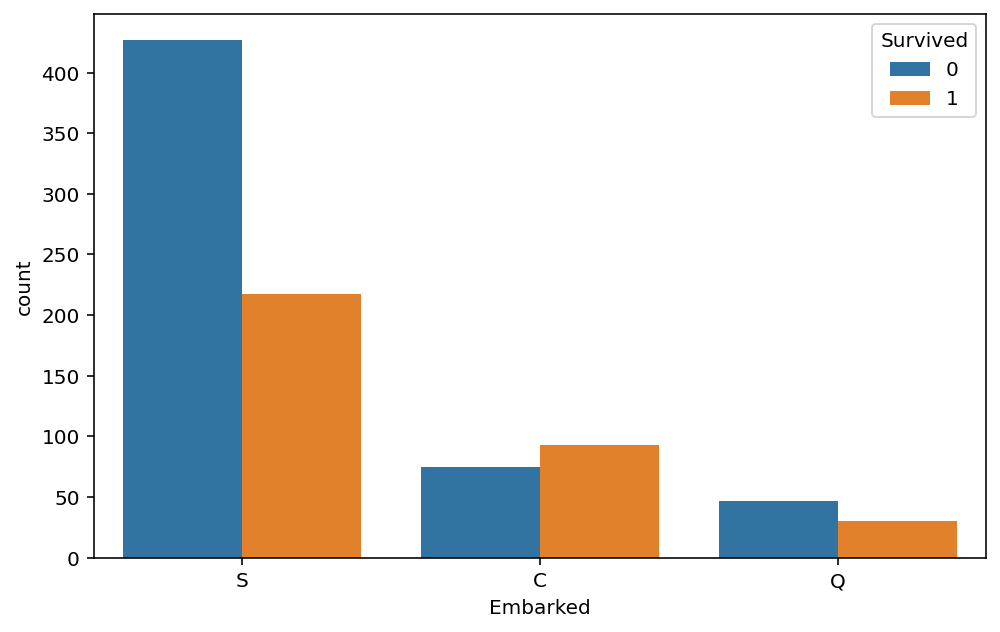

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x=train_df['Embarked'], hue='Survived',data=train_df);

Actually, 'Embarked' shows that more than a half of people who boarded in C survived, and 70 percent of those who boarded in S died. 

In [44]:
train_df['Embarked']=train_df['Embarked'].replace(to_replace=np.nan,value='S')

In [45]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Not sure if this is the best way, but i replaced 2 nan values in 'Embarked' with the largest value 'S'. In order to be able to use this feature more I will also turn it into integer where S=1, C=2, Q=3.

In [46]:
train_df['Embarked']=train_df['Embarked'].map({'S':1,'C':2,'Q':3})

# PART 2. MODEL

## Decision Trees
This is the first model i will build.

In [47]:
train_df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    1  22.0      1      0   7.2500         1
2                   1       1    0  38.0      1      0  71.2833         2
3                   1       3    0  26.0      0      0   7.9250         1
4                   1       1    0  35.0      1      0  53.1000         1
5                   0       3    1  35.0      0      0   8.0500         1

After preprocessing the Data i have no nan values and no categorical falues.

In [48]:
X,y=train_df.drop('Survived',axis=1),train_df['Survived']

where X-DataFrame of features used to train the model, y-target feature.

In [49]:
from sklearn.model_selection import train_test_split

Split the training data into two subframes 70% and 30%

In [50]:
X_train, X_holdout, y_train, y_holdout= \
        train_test_split(X,y,test_size=.3,random_state=67)

In [51]:
X_train.shape, X_holdout.shape  #Checking the size of split (just for visualization).

((623, 7), (268, 7))

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
tree=DecisionTreeClassifier(random_state=67)  #create DecisionTree

### *Fit-Predict*

In [54]:
tree.fit(X_train,y_train) #fit

DecisionTreeClassifier(random_state=67)

In [55]:
from sklearn.metrics import accuracy_score #It calculates accuracy

In [56]:
pred_holdout=tree.predict(X_holdout) #predict

In [57]:
accuracy_score(y_holdout,pred_holdout) #same as i got in Kaggle training course

0.7798507462686567

In [58]:
y.value_counts(normalize=True)   #doing this I can compare my result with baseline (0.62 vs 0.78) good result

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### *Now i will tune the hyperparameters of the tree*
(to see if it can do better)

In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [60]:
params = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}

In [61]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=67) #with this object you can specify your CV

In [62]:
best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skf, n_jobs=-1) #to get the result we need to fit data to it

In [63]:
best_tree.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=67, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=67), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [64]:
best_tree.best_params_ #best params shows the best configuration of hyperparams

{'max_depth': 10, 'min_samples_leaf': 3}

*Best params should be somewhere in the middle of the range i given, if they are near borders: (2,11) this is a bad sign.*

In [65]:
best_tree.best_score_ #CV assessment #Now with tuned hyperparams we have a better tree. And we calculate accuracy with it.

0.8186064516129032

In [66]:
pred_holdout_better=best_tree.predict(X_holdout)

In [67]:
accuracy_score(y_holdout,pred_holdout_better) #holdout assessment #result improved (0.779 vs 0.795) slightly better

0.7947761194029851

Now i need to try the model on test_df. And it seems i have to preprocess it to in order to try the model.

In [68]:
test_df=test_df.drop(['Name','Ticket','Cabin'],axis=1)

In [69]:
test_df['Sex']=test_df['Sex'].map({'female':0,'male':1})

In [70]:
test_df['Embarked']=test_df['Embarked'].map({'S':1, 'C':2, 'Q':3})

In [71]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [72]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [73]:
test_df.info()    #now test_df is preprocessed: have no null values, all objects are numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


In [74]:
X_test = test_df

In [75]:
predictions = best_tree.predict(X_test)

In [76]:
output = pd.DataFrame({'PassengerId':test_df.index,'Survived':predictions})

In [77]:
output.to_csv('decision_tree.csv',index=False)

With Decision trees the maximum accuracy I achieved is 0.75 which is even worth than the default Kaggle mini-course submission which uses only 'Sex' feature... <br>
Ok, I think I get it. The Kaggle variant uses Random Forest - very simple, without tuning or even using all avaliable features. I guess my scores is lower because Decision Tree is simply worse in this particular case.

## Linear models